In [63]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
df_ev = pd.read_csv("data/cleaned_chargingdata.csv")

In [65]:
df_ev

,Unnamed: 0.1,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,chargingDuration
0,0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,262.683333
1,1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,401.250000
2,2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,158.516667
3,3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,78.783333
4,4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,257.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,65032,8670,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12-07:00,2019-07-01 18:37:18-07:00,2019-07-01 16:14:33-07:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,America/Los_Angeles,1346.0,85.350000
64988,65033,8671,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:39:48-07:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0,161.050000
64989,65034,8672,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:58:50-07:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0,176.483333
64990,65035,8673,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44-07:00,2019-07-01 19:03:36-07:00,2019-07-01 19:03:36-07:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,America/Los_Angeles,1626.0,219.866667


In [66]:
df_ev['sessionID'].value_counts()

sessionID
1_1_179_810_2020-01-02 13:08:53.870034    1
2_39_127_19_2018-10-25 15:29:41.347098    1
2_39_79_376_2018-10-25 14:20:43.833640    1
2_39_138_29_2018-10-25 14:32:34.910076    1
2_39_79_377_2018-10-25 14:46:02.608536    1
                                         ..
2_39_127_19_2019-02-16 21:07:35.064898    1
2_39_79_379_2019-02-16 21:17:26.749878    1
2_39_83_386_2019-02-16 22:28:31.358531    1
2_39_125_21_2019-02-16 23:28:58.650931    1
1_1_193_819_2019-07-01 22:35:56.104381    1
Name: count, Length: 64992, dtype: int64

In [67]:
df_ev['id'].value_counts()

id
5e23b149f9af8b5fe4b973cf    1
5be4e347f9af8b3175206d65    1
5be4e347f9af8b3175206d58    1
5be4e347f9af8b3175206d59    1
5be4e347f9af8b3175206d5a    1
                           ..
5c7dd126f9af8b0c655c242c    1
5c7dd126f9af8b0c655c242d    1
5c7dd126f9af8b0c655c242e    1
5c7dd126f9af8b0c655c242f    1
5d2fbdd3f9af8b4d0dd0d54e    1
Name: count, Length: 64992, dtype: int64

In [68]:
check = df_ev[df_ev['sessionID'] == '1_1_179_779_2019-08-13 20:45:06.293662']

check.head()

,Unnamed: 0.1,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,chargingDuration
7605,7605,2032,5d686e3bf9af8b028d78892d,2019-08-13 13:45:06-07:00,2019-08-13 17:18:34-07:00,2019-08-13 17:18:34-07:00,16.77,1_1_179_779_2019-08-13 20:45:06.293662,1,AG-3F17,1-1-179-779,America/Los_Angeles,3222.0,213.466667


### There are multiple entries per sessionID for some, it's because they have multiple entries in the userInput column (with different modifiedAt times)
### For the cluster analysis, only one entry per sessionID/id will be used

In [69]:
df_ev_ca = df_ev.drop_duplicates(subset='id', keep='first')


In [70]:
df_ev_ca

,Unnamed: 0.1,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,chargingDuration
0,0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,262.683333
1,1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,401.250000
2,2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,158.516667
3,3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,78.783333
4,4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,257.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,65032,8670,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12-07:00,2019-07-01 18:37:18-07:00,2019-07-01 16:14:33-07:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,America/Los_Angeles,1346.0,85.350000
64988,65033,8671,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:39:48-07:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0,161.050000
64989,65034,8672,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:58:50-07:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0,176.483333
64990,65035,8673,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44-07:00,2019-07-01 19:03:36-07:00,2019-07-01 19:03:36-07:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,America/Los_Angeles,1626.0,219.866667


In [71]:
df_ev_ca.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
chargingDuration    float64
dtype: object

### Fix dtypes for time columns

In [72]:
# Remove timezone offset information from the string column before conversion
df_ev_ca['connectionTime'] = df_ev_ca['connectionTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
df_ev_ca['disconnectTime'] = df_ev_ca['disconnectTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
df_ev_ca['doneChargingTime'] = df_ev_ca['doneChargingTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)



In [73]:
# Ensure the columns are converted to datetime 
df_ev_ca['connectionTime'] = pd.to_datetime(df_ev_ca['connectionTime'], errors='coerce')
df_ev_ca['disconnectTime'] = pd.to_datetime(df_ev_ca['disconnectTime'], errors='coerce')
df_ev_ca['doneChargingTime'] = pd.to_datetime(df_ev_ca['doneChargingTime'], errors='coerce')

### Feature Engineering: create suitable features for cluster analysis 

In [74]:
# Create the charging_duration column
df_ev_ca['charging_duration'] = (df_ev_ca['doneChargingTime'] - df_ev_ca['connectionTime']).dt.total_seconds() / 60  # Duration in minutes
# remove negative charging_duration
df_ev_ca = df_ev_ca[df_ev_ca['charging_duration'] >= 0]

#Session Duration 
df_ev_ca['session_duration'] = (df_ev_ca['disconnectTime'] - df_ev_ca['connectionTime']).dt.total_seconds() / 60  # Duration in minutes

#idle_time
df_ev_ca['idle_time'] = (df_ev_ca['disconnectTime'] - df_ev_ca['doneChargingTime']).dt.total_seconds() / 60  # Duration in minutes
# remove negative idle_time
df_ev_ca = df_ev_ca[df_ev_ca['idle_time'] >= 0]

#efficiency ratio
df_ev_ca['efficiency_ratio'] = df_ev_ca['kWhDelivered'] / df_ev_ca['charging_duration']

In [75]:
df_ev_ca

,Unnamed: 0.1,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,chargingDuration,charging_duration,session_duration,idle_time,efficiency_ratio
0,0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54,2020-01-02 11:11:15,2020-01-02 09:31:35,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,262.683333,262.683333,362.350000,99.666667,0.095233
1,1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50,2020-01-02 14:38:21,2020-01-02 12:18:05,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,401.250000,401.250000,541.516667,140.266667,0.082485
2,2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35,2020-01-02 16:39:22,2020-01-02 08:35:06,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,158.516667,158.516667,642.783333,484.266667,0.041138
3,3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58,2020-01-02 08:38:39,2020-01-02 07:18:45,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,78.783333,78.783333,158.683333,79.900000,0.029892
4,4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01,2020-01-02 14:08:40,2020-01-02 10:17:30,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,257.483333,257.483333,488.650000,231.166667,0.051945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,65032,8670,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12,2019-07-01 18:37:18,2019-07-01 16:14:33,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,America/Los_Angeles,1346.0,85.350000,85.350000,228.100000,142.750000,0.098407
64988,65033,8671,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45,2019-07-01 17:39:48,2019-07-01 17:39:48,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0,161.050000,161.050000,161.050000,0.000000,0.104713
64989,65034,8672,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21,2019-07-01 17:58:50,2019-07-01 17:58:50,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0,176.483333,176.483333,176.483333,0.000000,0.103891
64990,65035,8673,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44,2019-07-01 19:03:36,2019-07-01 19:03:36,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,America/Los_Angeles,1626.0,219.866667,219.866667,219.866667,0.000000,0.103767


In [76]:
list(df_ev_ca.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'id',
 'connectionTime',
 'disconnectTime',
 'doneChargingTime',
 'kWhDelivered',
 'sessionID',
 'siteID',
 'spaceID',
 'stationID',
 'timezone',
 'userID',
 'chargingDuration',
 'charging_duration',
 'session_duration',
 'idle_time',
 'efficiency_ratio']

### Filter data to only include relevant cols

In [77]:
df_cluster = df_ev_ca[['charging_duration','efficiency_ratio','session_duration','idle_time']]

df_cluster

,charging_duration,efficiency_ratio,session_duration,idle_time
0,262.683333,0.095233,362.350000,99.666667
1,401.250000,0.082485,541.516667,140.266667
2,158.516667,0.041138,642.783333,484.266667
3,78.783333,0.029892,158.683333,79.900000
4,257.483333,0.051945,488.650000,231.166667
...,...,...,...,...
64987,85.350000,0.098407,228.100000,142.750000
64988,161.050000,0.104713,161.050000,0.000000
64989,176.483333,0.103891,176.483333,0.000000
64990,219.866667,0.103767,219.866667,0.000000


In [78]:
print(np.isinf(df_cluster).sum())  


charging_duration    0
efficiency_ratio     2
session_duration     0
idle_time            0
dtype: int64


In [79]:
df_cluster.replace([np.inf, -np.inf], np.nan, inplace=True)

In [80]:
df_cluster = df_cluster.dropna()

In [81]:
df_cluster

,charging_duration,efficiency_ratio,session_duration,idle_time
0,262.683333,0.095233,362.350000,99.666667
1,401.250000,0.082485,541.516667,140.266667
2,158.516667,0.041138,642.783333,484.266667
3,78.783333,0.029892,158.683333,79.900000
4,257.483333,0.051945,488.650000,231.166667
...,...,...,...,...
64987,85.350000,0.098407,228.100000,142.750000
64988,161.050000,0.104713,161.050000,0.000000
64989,176.483333,0.103891,176.483333,0.000000
64990,219.866667,0.103767,219.866667,0.000000


### Prepare df for cluster analysis using Standardization

In [82]:
# Standardize and keep DataFrame format
scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(
    scaler.fit_transform(df_cluster),
    columns=df_cluster.columns,
    index=df_cluster.index
)

# Reset index
df_cluster_scaled = df_cluster_scaled.reset_index(drop = True)
df_cluster_scaled

,charging_duration,efficiency_ratio,session_duration,idle_time
0,0.287608,0.208458,-0.046194,-0.259016
1,1.119666,0.113891,0.610126,-0.085218
2,-0.337886,-0.192835,0.981085,1.387355
3,-0.816665,-0.276258,-0.792263,-0.343632
4,0.256384,-0.112662,0.416466,0.303901
...,...,...,...,...
64985,-0.777233,0.232004,-0.537977,-0.074587
64986,-0.322674,0.278786,-0.783594,-0.685662
64987,-0.230001,0.272688,-0.727058,-0.685662
64988,0.030505,0.271772,-0.568137,-0.685662


## KMEeans ++ Clustering

### 1. Elbow and Silhouette Score to identify the best number of cluster centers 

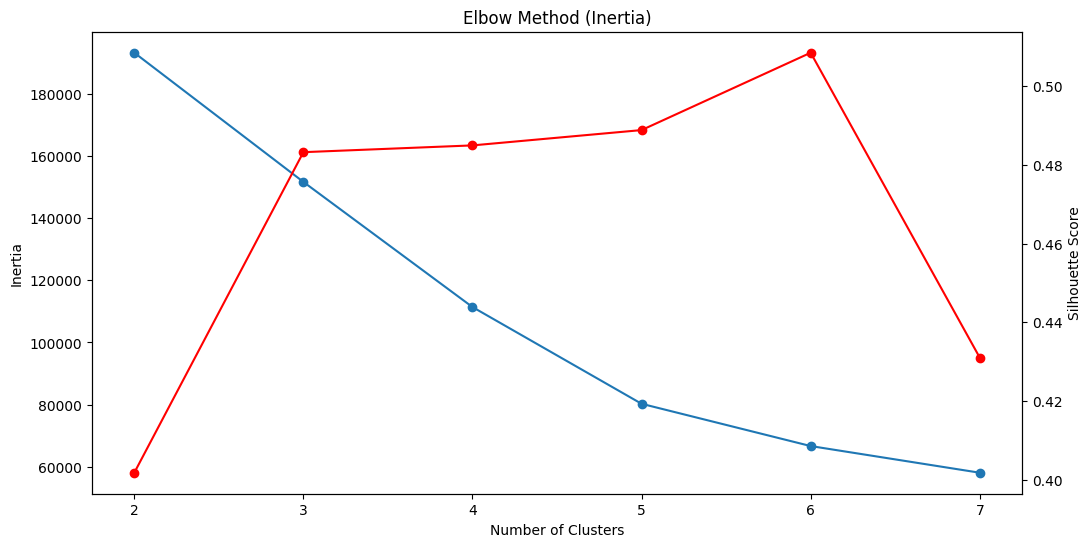

In [83]:
# Prepare the data for clustering 
X = df_cluster_scaled

# Elbow method and Silhouette Score together
inertia = []  # For Elbow
silhouette_scores = []  # For Silhouette Score
range_clusters = range(2, 8)  # Testing cluster sizes from 2 to 8

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to nearest cluster center
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Elbow method plot
ax1.plot(range_clusters, inertia, marker='o')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method (Inertia)')

# Silhouette score plot
ax2 = ax1.twinx()
ax2.plot(range_clusters, silhouette_scores, marker='o', color='red')
ax2.set_ylabel('Silhouette Score')

plt.show()

#### 5 clusters seem to be optimal, best Silhouette Score and visible flattening of elbow point at 5 centers

### Fit the Model with 5 Clusters

In [84]:
# Fit KMeans with optimal number of clusters (5)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X)

# Copy DataFrame
df_cluster_kmeans = df_cluster.copy()

# Adding cluster labels to the dataframe
df_cluster_kmeans['Cluster'] = cluster_labels


df_cluster_kmeans.head()

,charging_duration,efficiency_ratio,session_duration,idle_time,Cluster
0,262.683333,0.095233,362.350000,99.666667,1
1,401.250000,0.082485,541.516667,140.266667,2
2,158.516667,0.041138,642.783333,484.266667,0
3,78.783333,0.029892,158.683333,79.900000,1
4,257.483333,0.051945,488.650000,231.166667,0


In [85]:
df_cluster_kmeans['Cluster'].value_counts().sort_index()

Cluster
0    19858
1    31178
2    13821
3        3
4      130
Name: count, dtype: int64

In [86]:
# Adding cluster labels to the dataframe
df_cluster_kmeans['Cluster'] = cluster_labels

# Count the number of samples in each cluster
cluster_counts = df_cluster_kmeans['Cluster'].value_counts().sort_index()

# Calculate the percentage for each cluster
cluster_percentages = (cluster_counts / len(df_cluster_kmeans)) * 100

# Create a DataFrame combining both count and percentage
cluster_summary = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage': cluster_percentages
})

# Display the result
print(cluster_summary)


         Count  Percentage
Cluster                   
0        19858   30.555470
1        31178   47.973534
2        13821   21.266349
3            3    0.004616
4          130    0.200031


In [87]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans_final.cluster_centers_), 
                               columns=df_cluster_kmeans.columns[:-1])
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
   charging_duration  efficiency_ratio  session_duration    idle_time
0         174.844359          0.056384        562.654752   387.810394
1         126.932464          0.081523        170.663753    43.731289
2         468.092345          0.046866        536.902017    68.809671
3           0.905556         15.687773        333.000000   332.094444
4         446.968077          0.053520       3464.547051  3017.578974


## Interpretation of Clusters

### Cluster 0: Overnight Charging
### Cluster 1: Standard Charging Event
### Cluster 2: High-Usage Charging
### Cluster 3: Faulty Connection
### Cluster 4: Long-Term Parking Charge

In [88]:

df_cluster_kmeans.groupby('Cluster').mean() # cluster center = mean values per cluster

,charging_duration,efficiency_ratio,session_duration,idle_time
Cluster,,,,
0,174.853930,0.056382,562.677288,387.823358
1,126.958057,0.081521,170.701839,43.743782
2,468.151213,0.046855,536.972940,68.821727
3,0.905556,15.687773,333.000000,332.094444
4,446.968077,0.053520,3464.547051,3017.578974


In [89]:
# Count the number of samples in each cluster
cluster_counts = df_cluster_kmeans['Cluster'].value_counts().sort_index()

# Get the mean values for each cluster (cluster center)
df_cluster_means = df_cluster_kmeans.groupby('Cluster').mean()

# Add the count column to the mean values DataFrame
df_cluster_means['Count'] = df_cluster_means.index.map(cluster_counts)

# Show the summary with mean values and counts
df_cluster_means

,charging_duration,efficiency_ratio,session_duration,idle_time,Count
Cluster,,,,,
0,174.853930,0.056382,562.677288,387.823358,19858
1,126.958057,0.081521,170.701839,43.743782,31178
2,468.151213,0.046855,536.972940,68.821727,13821
3,0.905556,15.687773,333.000000,332.094444,3
4,446.968077,0.053520,3464.547051,3017.578974,130


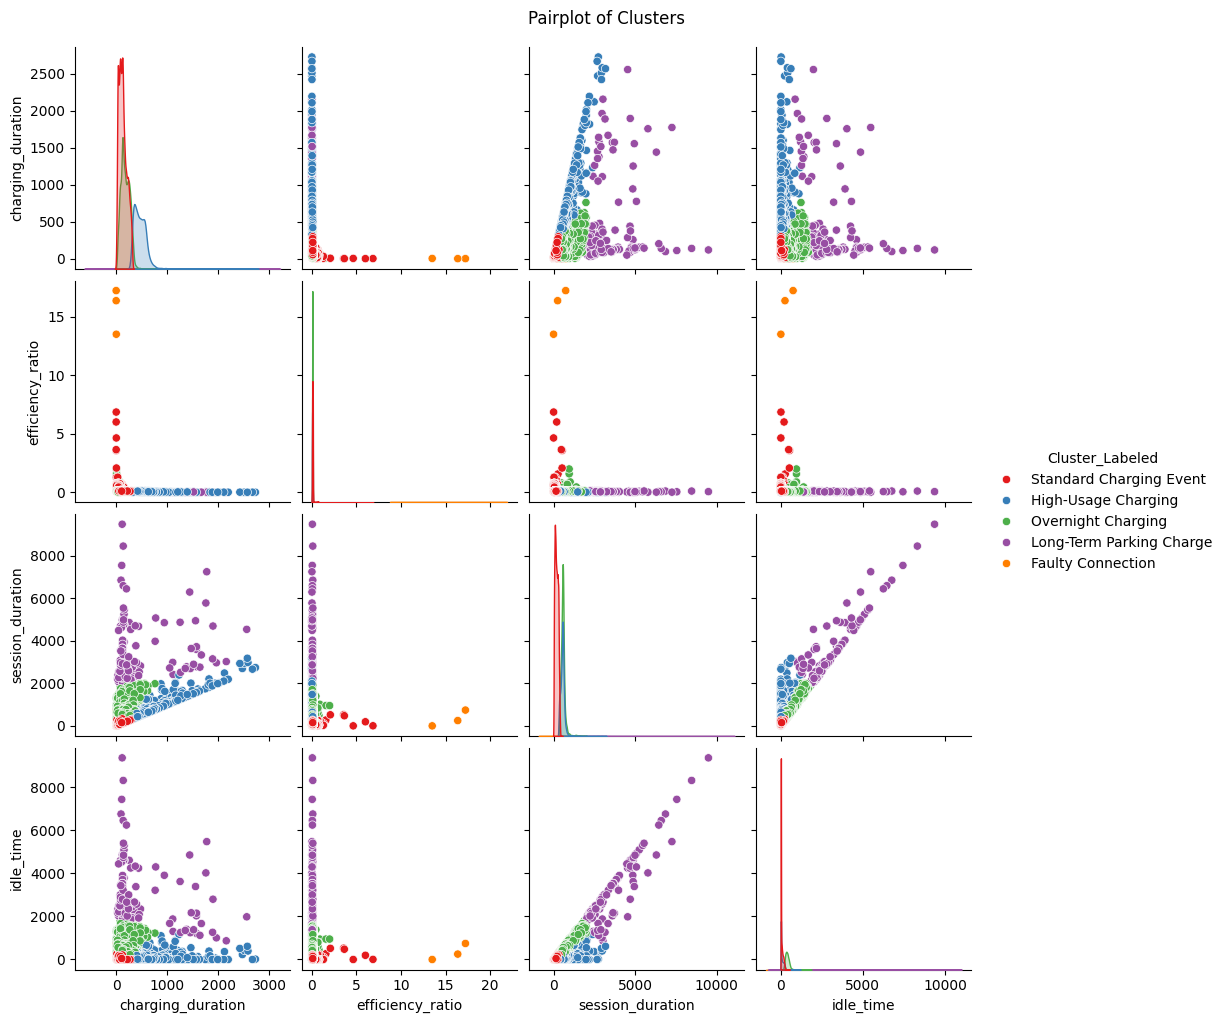

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_labels = {
    0: 'Overnight Charging',
    1: 'Standard Charging Event',
    2: 'High-Usage Charging',
    3: 'Faulty Connection',
    4: 'Long-Term Parking Charge'
}
df_cluster_kmeans['Cluster_Labeled'] = df_cluster_kmeans['Cluster'].map(cluster_labels)

# Pairplot for the Cluster
sns.pairplot(
    df_cluster_kmeans, 
    hue='Cluster_Labeled', 

    vars=['charging_duration', 'efficiency_ratio', 'session_duration', 'idle_time'], 
    palette='Set1',
    diag_kind='kde'
)

plt.suptitle('Pairplot of Clusters', y=1.02)  # Titel hinzufügen
plt.show()


## Hierachical Clustering

- Ward's method minimizes the total variance within each cluster

In [91]:
# Perform hierarchical clustering using Ward's method
#linkage_matrix = linkage(df_cluster_scaled, method='ward')

In [92]:
# Save the linkage matrix to a file
#np.save('linkage_matrix.npy', linkage_matrix)

In [93]:
# Load the saved linkage matrix
linkage_matrix = np.load('linkage_matrix.npy')

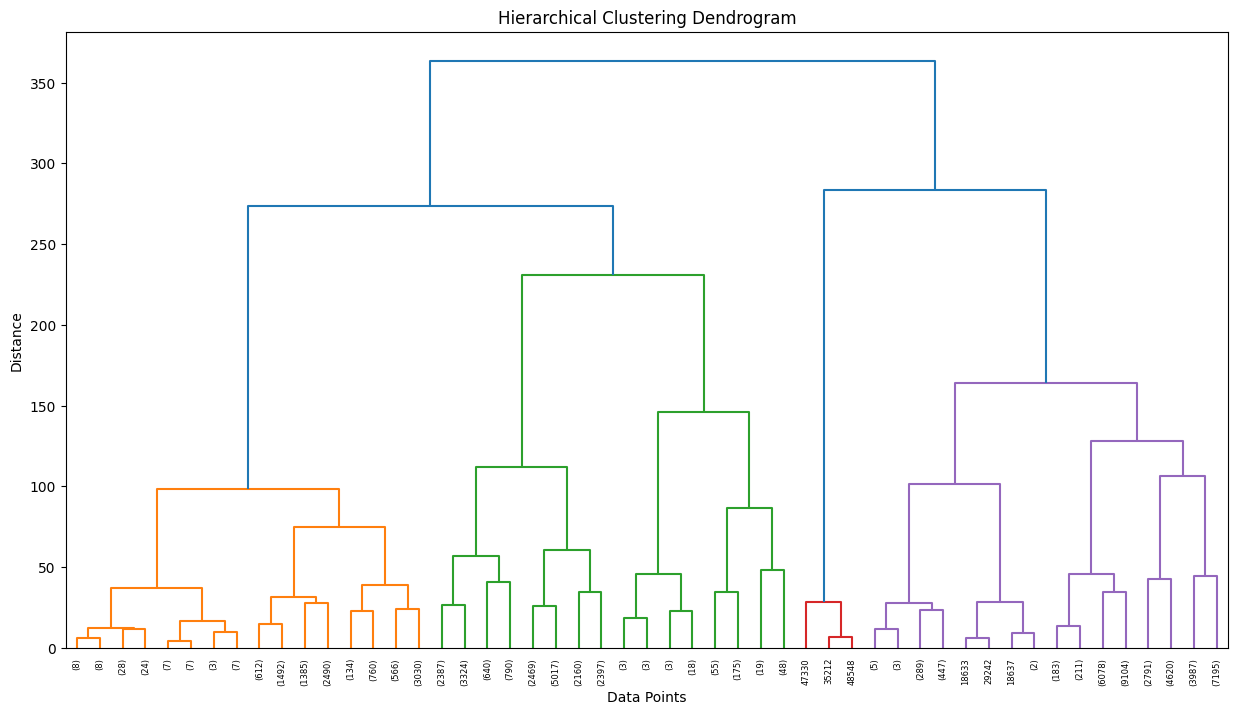

In [94]:
# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode="level", p=5)  # Truncate for clarity (p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Dendogram also indicates 5 clusters (cut at distance 150)

In [95]:
from scipy.cluster.hierarchy import fcluster

# Copy DataFrame
df_cluster_hierachical = df_cluster.copy()

# Extract cluster labels 
optimal_clusters =  5 
cluster_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Add the cluster labels back to the dataframe
df_cluster_hierachical['Cluster'] = cluster_labels
df_cluster_hierachical.head()


,charging_duration,efficiency_ratio,session_duration,idle_time,Cluster
0,262.683333,0.095233,362.350000,99.666667,5
1,401.250000,0.082485,541.516667,140.266667,1
2,158.516667,0.041138,642.783333,484.266667,2
3,78.783333,0.029892,158.683333,79.900000,5
4,257.483333,0.051945,488.650000,231.166667,2


In [96]:
df_cluster_hierachical['Cluster'].value_counts().sort_index()

Cluster
1    10561
2    19184
3      324
4        3
5    34918
Name: count, dtype: int64

In [97]:
df_cluster_hierachical.groupby('Cluster').mean()

,charging_duration,efficiency_ratio,session_duration,idle_time
Cluster,,,,
1,507.172081,0.044679,555.627485,48.455404
2,205.924415,0.055006,572.731223,366.806808
3,295.779372,0.068361,2242.629012,1946.849640
4,0.905556,15.687773,333.000000,332.094444
5,130.489735,0.079232,194.335649,63.845914


In [17]:
#df_cluster_kmeans.groupby('Cluster').mean()

In [102]:
df_cluster_kmeans['Cluster'].value_counts().sort_index()

Cluster
0    19858
1    31178
2    13821
3        3
4      130
Name: count, dtype: int64

### Analysis of Dendogram clusters reveals same charging event categories as kmeans++ analysis

### answer task question: What is the value of identifying different types of charging sessions?

- understand which kind of charging events exist 
- know the distribution of these different charging event categories 
- identify inefficiencies by detecting faulty or incomplete charging events
- improve user experience by using the gained insights, e.g fast charging vs. long-term parking
- decrease idle times by learning about typical high idle time charging events
- use insights to do further analysis to gain deeper understanding 
- general: data-driven decisions to improve business model 
